In [19]:
import linopy
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from shapely import wkt
import numpy as np

In [20]:
mwperkm2_wind = 4.5 ## originally 9 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET
mwperkm2_solar = 15 ## originally 30 MW/km2 but deduct by 50% of the technically available from IEA's Thailand CET

maxcapacityfor_spp = 90
maxcapacityfor_vspp = 10

radius_spp_wind = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_wind * 3.14)) / 100,5)
radius_vspp_wind = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_wind * 3.14)) / 100,5)

radius_spp_solar = np.round(np.sqrt(maxcapacityfor_spp/(mwperkm2_solar * 3.14)) / 100,5)
radius_vspp_solar = np.round(np.sqrt(maxcapacityfor_vspp/(mwperkm2_solar * 3.14)) / 100,5)

suitablearea_biomass = 2500 ## km2 
suitablearea_bgec = 2500 ## km2
suitablearea_msw = 2500 ## km2

print('radius_spp_wind km = ',radius_spp_wind*100,' buffer = ',radius_spp_wind)
print('radius_vspp_wind km = ',radius_vspp_wind*100,' buffer = ',radius_vspp_wind)
print('radius_spp_solar km = ',radius_spp_solar*100,' buffer = ',radius_spp_solar)
print('radius_vspp_solar km = ',radius_vspp_solar*100,' buffer = ',radius_vspp_solar)

radius_spp_wind km =  2.524  buffer =  0.02524
radius_vspp_wind km =  0.8410000000000001  buffer =  0.00841
radius_spp_solar km =  1.3820000000000001  buffer =  0.01382
radius_vspp_solar km =  0.461  buffer =  0.00461


In [21]:
scenario_SI = 0

xr_out = xr.open_dataset('Output\\xr_output_all_scenario_SI_' + str(scenario_SI) + '_.nc')
print(xr_out)
print("cap_wind = ",xr_out['cap_wind'].sum())
print("cap_solar = ",xr_out['cap_solar'].sum())
print("cap_biomass = ",xr_out['cap_biomass'].sum())
print("cap_bgec = ",xr_out['cap_bgec'].sum())
print("cap_msw = ",xr_out['cap_msw'].sum())

<xarray.Dataset>
Dimensions:      (lat: 534, lon: 298)
Coordinates:
  * lat          (lat) float64 5.628 5.656 5.683 5.711 ... 20.38 20.41 20.43
  * lon          (lon) float64 97.36 97.39 97.41 97.44 ... 105.6 105.6 105.6
Data variables: (12/21)
    lccs_class   (lat, lon) int64 ...
    SI_BGEC      (lat, lon) float64 ...
    SI_Biomass   (lat, lon) float64 ...
    SI_Solar     (lat, lon) float64 ...
    SI_Wind      (lat, lon) float64 ...
    SI_MSW       (lat, lon) float64 ...
    ...           ...
    region       (lat, lon) <U2 ...
    cap_wind     (lat, lon) float64 ...
    cap_solar    (lat, lon) float64 ...
    cap_biomass  (lat, lon) float64 ...
    cap_bgec     (lat, lon) float64 ...
    cap_msw      (lat, lon) float64 ...
cap_wind =  <xarray.DataArray 'cap_wind' ()>
array(6345.7)
cap_solar =  <xarray.DataArray 'cap_solar' ()>
array(19300.4)
cap_biomass =  <xarray.DataArray 'cap_biomass' ()>
array(695.)
cap_bgec =  <xarray.DataArray 'cap_bgec' ()>
array(967.4)
cap_msw =  <xarr

In [22]:
df_wind = xr_out.to_dataframe()
xr_out.close()
df_wind.reset_index(inplace=True)
df_wind = gpd.GeoDataFrame(df_wind, geometry =gpd.points_from_xy(df_wind['lon'],df_wind['lat']))
df_wind.crs = {'init': 'epsg:4326'}
print(len(df_wind))
for i,c in enumerate(df_wind.columns):
    if c not in (['lon','lat','SI_Wind','SI_Wind_max','SI_Wind_min','region','ADM1_EN','cap_wind','AVA_Wind','geometry']):
        df_wind = df_wind.drop(columns=c)

df_wind = df_wind.loc[df_wind['cap_wind'] > 0]
df_wind.reset_index(inplace=True,drop=False)
df_wind.crs = {'init': 'epsg:4326'}
df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)
df_wind = df_wind.set_geometry('buffer')

df_wind.to_csv('Output\\Output_wind_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_wind)

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


159132
      index        lat         lon   SI_Wind  AVA_Wind              ADM1_EN  \
0     26011   8.044444   99.719444  2.065783  8.820002  Nakhon Si Thammarat   
1     26015   8.044444   99.830556  2.289972  9.000000  Nakhon Si Thammarat   
2     26313   8.072222   99.830556  2.224268  8.910001  Nakhon Si Thammarat   
3     41777   9.516667   98.941667  1.988547  9.000000          Surat Thani   
4     42075   9.544444   98.941667  2.079122  9.000000               Ranong   
..      ...        ...         ...       ...       ...                  ...   
190  134011  18.100000  103.163889  1.517920  8.370001            Nong Khai   
191  135522  18.238889  103.747222  1.065352  6.480000            Bueng Kan   
192  135805  18.266667  103.330556  1.690888  8.910000            Bueng Kan   
193  135806  18.266667  103.358333  1.946305  9.000000            Bueng Kan   
194  135807  18.266667  103.386111  1.797154  9.000000            Bueng Kan   

    region  cap_wind                    geom

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\spdgen4\AppData\Local\Temp\2\ipykernel_21804\31956592.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_wind['buffer'] = df_wind['geometry'].buffer(np.round(np.sqrt(df_wind['cap_wind']/(mwperkm2_wind * 3.14)) / 100,5),cap_style = 3)


In [23]:
df_solar = xr_out.to_dataframe()
df_solar.reset_index(inplace=True)
df_solar = gpd.GeoDataFrame(df_solar, geometry =gpd.points_from_xy(df_solar['lon'],df_solar['lat']))
df_solar.crs = {'init': 'epsg:4326'}
print(len(df_solar))
for i,c in enumerate(df_solar.columns):
    if c not in (['lon','lat','SI_Solar','SI_Solar_max','SI_Solar_min','region','ADM1_EN','cap_solar','AVA_Solar','geometry']):
        df_solar = df_solar.drop(columns=c)

df_solar = df_solar.loc[df_solar['cap_solar'] > 0]
df_solar.reset_index(inplace=True,drop=False)
df_solar.crs = {'init': 'epsg:4326'}
df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)
df_solar = df_solar.set_geometry('buffer')

df_solar.to_csv('Output\\Output_solar_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_solar)

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


159132
      index        lat         lon  SI_Solar  AVA_Solar           ADM1_EN  \
0     12611   6.794444   99.997222  1.619596   5.760001             Satun   
1     15597   7.072222  100.163889  1.918253   7.290000             Satun   
2     15895   7.100000  100.163889  2.368814   9.000000             Satun   
3     17398   7.238889  100.525000  1.694276   5.850000          Songkhla   
4     17694   7.266667  100.469444  2.291974   7.830001          Songkhla   
..      ...        ...         ...       ...        ...               ...   
161  130996  17.822222  102.191667  1.752351   7.740000  Nong Bua Lam Phu   
162  131321  17.850000  102.941667  1.777551   7.020000         Nong Khai   
163  131593  17.877778  102.219444  1.774828   8.010000         Nong Khai   
164  132208  17.933333  102.747222  1.779435   7.200001         Nong Khai   
165  132839  17.988889  103.719444  1.642149   6.660000         Bueng Kan   

    region  cap_solar                    geometry  \
0       R3     

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\spdgen4\AppData\Local\Temp\2\ipykernel_21804\1997959653.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_solar['buffer'] = df_solar['geometry'].buffer(np.round(np.sqrt(df_solar['cap_solar']/(mwperkm2_solar * 3.14)) / 100,5),cap_style = 3)


In [24]:
df_biomass = xr_out.to_dataframe()
df_biomass.reset_index(inplace=True)
df_biomass = gpd.GeoDataFrame(df_biomass, geometry =gpd.points_from_xy(df_biomass['lon'],df_biomass['lat']))
df_biomass.crs = {'init': 'epsg:4326'}
print(len(df_biomass))
for i,c in enumerate(df_biomass.columns):
    if c not in (['lon','lat','SI_Biomass','SI_Biomass_max','SI_Biomass_min','region','ADM1_EN','cap_biomass','geometry']):
        df_biomass = df_biomass.drop(columns=c)

df_biomass = df_biomass.loc[df_biomass['cap_biomass'] > 0]
df_biomass.reset_index(inplace=True,drop=False)
df_biomass.crs = {'init': 'epsg:4326'}
df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)
df_biomass = df_biomass.set_geometry('buffer')

df_biomass.to_csv('Output\\Output_biomass_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_biomass)

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


159132
    index        lat         lon  SI_Biomass              ADM1_EN region  \
0   26024   8.044444  100.080556    2.115590  Nakhon Si Thammarat     R3   
1   94269  14.405556  100.163889    0.312356            Ang Thong     R1   
2  107065  15.600000   99.663889    2.483849          Uthai Thani     R4   
3  108892  15.766667  100.747222    0.767073         Nakhon Sawan     R4   
4  127678  17.516667  101.080556    0.908914                 Loei     R2   
5  128308  17.572222  102.025000    2.194470                 Loei     R2   
6  133126  18.016667  103.413889    0.741361            Bueng Kan     R2   

   cap_biomass                    geometry  \
0         60.0   POINT (100.08056 8.04444)   
1        145.0  POINT (100.16389 14.40556)   
2         17.7   POINT (99.66389 15.60000)   
3        212.3  POINT (100.74722 15.76667)   
4          9.8  POINT (101.08056 17.51667)   
5         96.1  POINT (102.02500 17.57222)   
6        154.1  POINT (103.41389 18.01667)   

               

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\spdgen4\AppData\Local\Temp\2\ipykernel_21804\2327727840.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_biomass['buffer'] = df_biomass['geometry'].buffer(np.round(np.sqrt(suitablearea_biomass/(3.14)) / 150,5),cap_style = 3)


In [25]:
df_bgec = xr_out.to_dataframe()
df_bgec.reset_index(inplace=True)
df_bgec = gpd.GeoDataFrame(df_bgec, geometry =gpd.points_from_xy(df_bgec['lon'],df_bgec['lat']))
df_bgec.crs = {'init': 'epsg:4326'}
print(len(df_bgec))
for i,c in enumerate(df_bgec.columns):
    if c not in (['lon','lat','SI_BGEC','SI_BGEC_max','SI_BGEC_min','region','ADM1_EN','cap_bgec','geometry']):
        df_bgec = df_bgec.drop(columns=c)

df_bgec = df_bgec.loc[df_bgec['cap_bgec'] > 0]
df_bgec.reset_index(inplace=True,drop=False)
df_bgec.crs = {'init': 'epsg:4326'}
df_bgec['buffer'] = df_bgec['geometry'].buffer(np.round(np.sqrt(suitablearea_bgec/(3.14)) / 150,5),cap_style = 3)
df_bgec = df_bgec.set_geometry('buffer')

df_bgec.to_csv('Output\\Output_bgec_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_bgec)

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


159132
     index        lat         lon   SI_BGEC      ADM1_EN region  cap_bgec  \
0    10559   6.600000  100.941667  0.353792      Pattani     R3       4.1   
1    13521   6.877778  100.441667  0.720507     Songkhla     R3       7.1   
2    18579   7.350000  100.219444  1.234440  Phatthalung     R3       5.2   
3    18855   7.377778   99.608333  0.619264        Trang     R3       6.9   
4    23915   7.850000   99.441667  1.681918        Trang     R3      14.7   
..     ...        ...         ...       ...          ...    ...       ...   
92  138030  18.488889   98.913889  0.369148   Chiang Mai     R4       4.0   
93  141971  18.850000  100.775000  0.103829          Nan     R4       0.6   
94  145514  19.183333   99.858333  0.329464       Phayao     R4       0.3   
95  150589  19.655556  100.108333  0.609736   Chiang Rai     R4       0.7   
96  152945  19.877778   99.330556  0.723207   Chiang Rai     R4       0.3   

                      geometry  \
0    POINT (100.94167 6.60000)   


C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\spdgen4\AppData\Local\Temp\2\ipykernel_21804\893800580.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_bgec['buffer'] = df_bgec['geometry'].buffer(np.round(np.sqrt(suitablearea_bgec/(3.14)) / 150,5),cap_style = 3)


In [26]:
df_msw = xr_out.to_dataframe()
df_msw.reset_index(inplace=True)
df_msw = gpd.GeoDataFrame(df_msw, geometry =gpd.points_from_xy(df_msw['lon'],df_msw['lat']))
df_msw.crs = {'init': 'epsg:4326'}
print(len(df_msw))
for i,c in enumerate(df_msw.columns):
    if c not in (['lon','lat','SI_MSW','SI_MSW_max','SI_MSW_min','region','ADM1_EN','cap_msw','geometry']):
        df_msw = df_msw.drop(columns=c)

df_msw = df_msw.loc[df_msw['cap_msw'] > 0]
df_msw.reset_index(inplace=True,drop=False)
df_msw.crs = {'init': 'epsg:4326'}
df_msw['buffer'] = df_msw['geometry'].buffer(np.round(np.sqrt(suitablearea_msw/(3.14)) / 150,5),cap_style = 3)
df_msw = df_msw.set_geometry('buffer')

df_msw.to_csv('Output\\Output_msw_all_scenario_SI_' + str(scenario_SI) + '.csv',index=False,encoding="utf-8-sig")

print(df_msw)

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


159132
     index        lat         lon    SI_MSW        ADM1_EN region  cap_msw  \
0     6123   6.183333  101.886111  1.272158     Narathiwat     R3     44.1   
1     9384   6.488889  101.413889  0.528616        Pattani     R3     40.0   
2    26258   8.072222   98.302778  0.044466         Phuket     R3     11.9   
3    36690   9.044444   98.358333  0.153105       Phangnga     R3      8.0   
4    84461  13.488889  100.886111  0.629293   Samut Prakan     R0    195.0   
5    89526  13.961111  100.858333  0.958203   Pathum Thani     R1    190.0   
6    95855  14.544444  102.830556  1.483688       Buri Ram     R2     26.6   
7    96171  14.572222  103.330556  0.434424       Buri Ram     R2     24.8   
8   101224  15.044444  102.969444  0.256746       Buri Ram     R2     36.0   
9   111369  15.988889  103.330556  0.156243  Maha Sarakham     R2     34.0   
10  121095  16.905556  100.330556  0.251557    Phitsanulok     R4     50.4   
11  125099  17.266667  103.941667  0.627838   Sakon Nakho

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\spdgen4\AppData\Local\Temp\2\ipykernel_21804\1325974872.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df_msw['buffer'] = df_msw['geometry'].buffer(np.round(np.sqrt(suitablearea_msw/(3.14)) / 150,5),cap_style = 3)


C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  6345.7
R0 wind =  0.0
R1 wind =  0.0
R2 wind =  6085.7
R3 wind =  260.0
R4 wind =  0.0


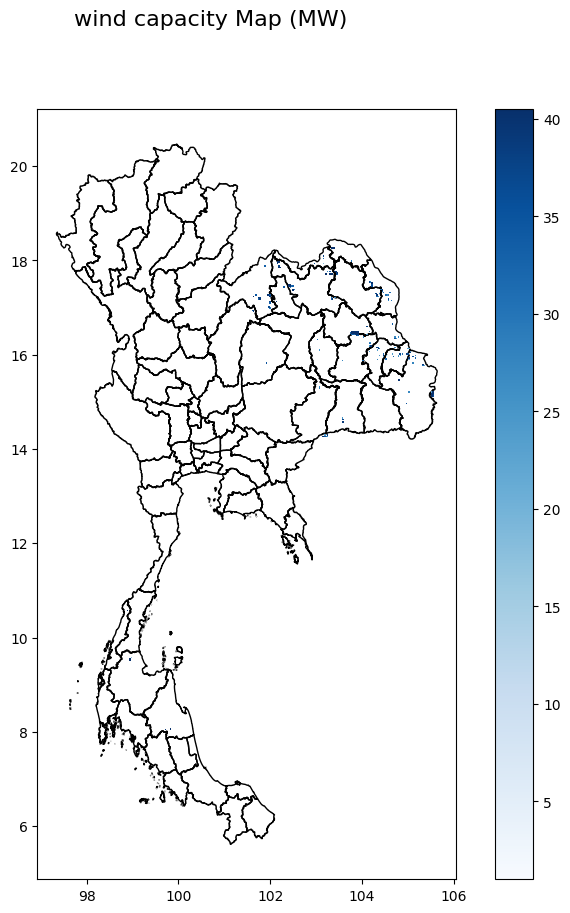

In [27]:
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}

print("total wind capacity = ", df_wind['cap_wind'].sum())
print("R0 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R0'].sum())
print("R1 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R1'].sum())
print("R2 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R2'].sum())
print("R3 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R3'].sum())
print("R4 wind = ",df_wind['cap_wind'].loc[df_wind['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))
fig.suptitle('wind capacity Map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_wind.plot(ax = ax,legend=True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None

total solar capacity =  19300.4
R0 Solar =  23.3
R1 Solar =  1423.4
R2 Solar =  5943.400000000001
R3 Solar =  5820.900000000001
R4 Solar =  6089.400000000001


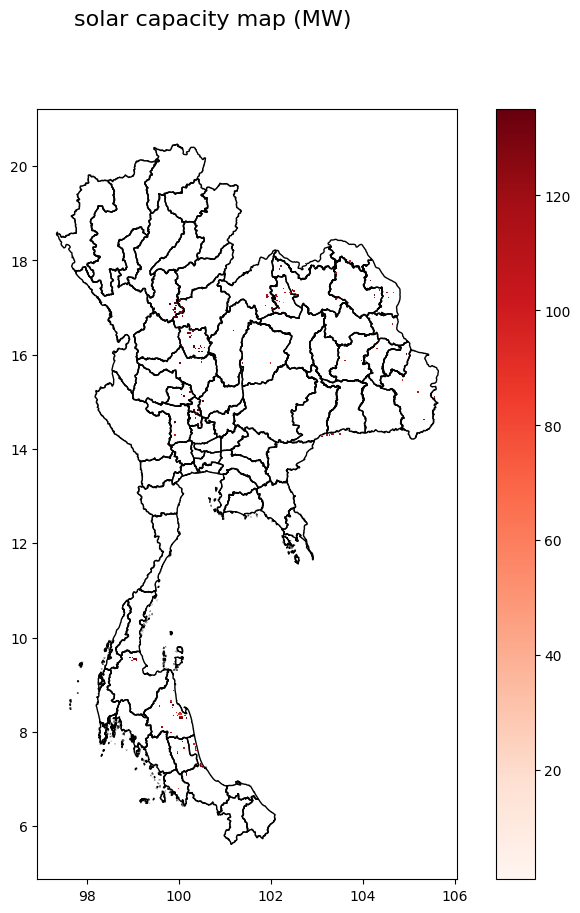

In [28]:
print("total solar capacity = ", df_solar['cap_solar'].sum())
print("R0 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R0'].sum())
print("R1 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R1'].sum())
print("R2 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R2'].sum())
print("R3 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R3'].sum())
print("R4 Solar = ",df_solar['cap_solar'].loc[df_solar['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('solar capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_solar.plot(ax = ax,legend=True,zorder = 1,column = 'cap_solar',cmap = 'Reds')
except:
    None


total biomass capacity =  695.0
R0 biomass =  0.0
R1 biomass =  145.0
R2 biomass =  260.0
R3 biomass =  60.0
R4 biomass =  230.0


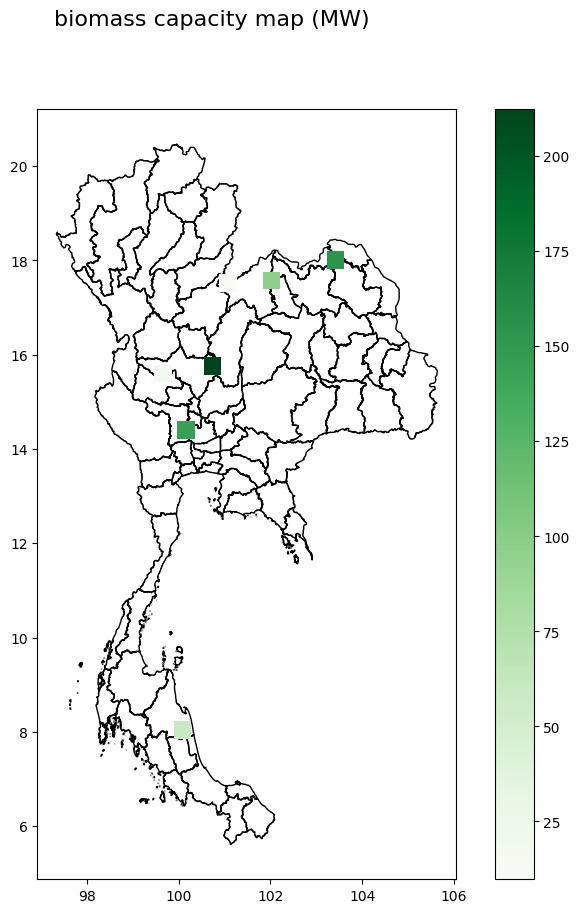

In [29]:
print("total biomass capacity = ", df_biomass['cap_biomass'].sum())
print("R0 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R0'].sum())
print("R1 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R1'].sum())
print("R2 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R2'].sum())
print("R3 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R3'].sum())
print("R4 biomass = ",df_biomass['cap_biomass'].loc[df_biomass['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('biomass capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_biomass.plot(ax = ax,legend=True,zorder = 1,column = 'cap_biomass',cmap = 'Greens')
except:
    None

total bgec capacity =  967.4
R0 bgec =  0.0
R1 bgec =  260.3
R2 bgec =  460.00000000000006
R3 bgec =  163.1
R4 bgec =  83.99999999999999


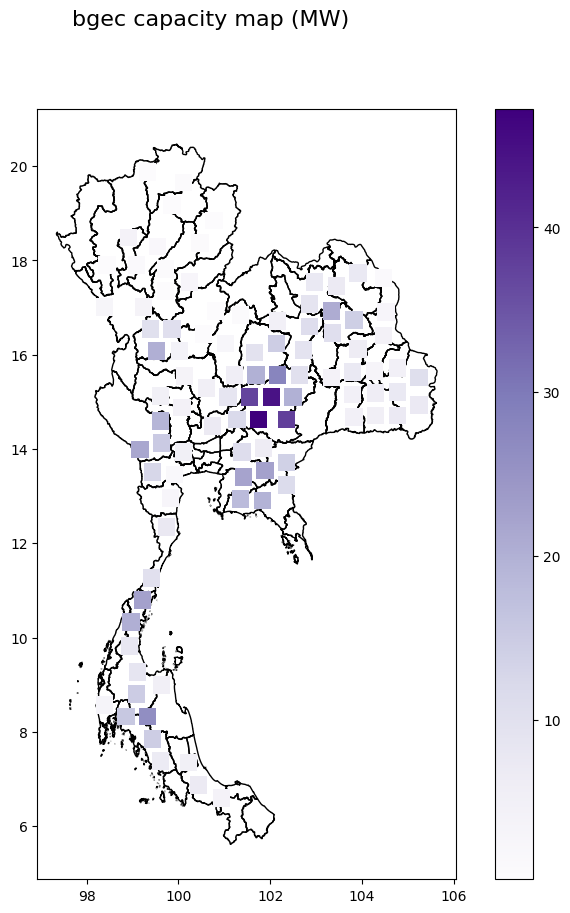

In [30]:
print("total bgec capacity = ", df_bgec['cap_bgec'].sum())
print("R0 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R0'].sum())
print("R1 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R1'].sum())
print("R2 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R2'].sum())
print("R3 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R3'].sum())
print("R4 bgec = ",df_bgec['cap_bgec'].loc[df_bgec['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('bgec capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_bgec.plot(ax = ax,legend=True,zorder = 1,column = 'cap_bgec',cmap = 'Purples')
except:
    None

total msw capacity =  814.0
R0 msw =  195.0
R1 msw =  190.0
R2 msw =  234.0
R3 msw =  104.0
R4 msw =  91.0


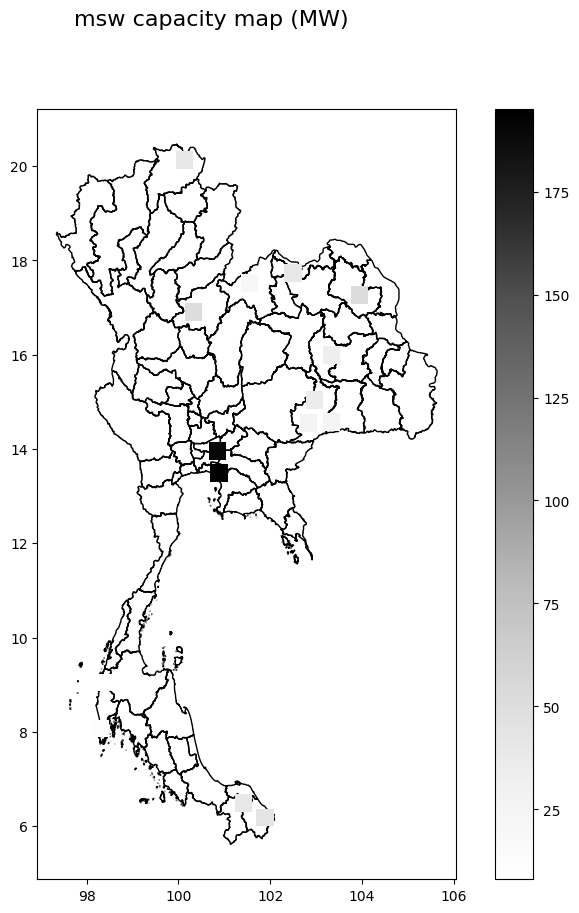

In [31]:
print("total msw capacity = ", df_msw['cap_msw'].sum())
print("R0 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R0'].sum())
print("R1 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R1'].sum())
print("R2 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R2'].sum())
print("R3 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R3'].sum())
print("R4 msw = ",df_msw['cap_msw'].loc[df_msw['region'] == 'R4'].sum())

fig, ax = plt.subplots(figsize=(10,10))

fig.suptitle('msw capacity map (MW)', fontsize=16)
try:
    thailandmap.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
    df_msw.plot(ax = ax,legend=True,zorder = 1,column = 'cap_msw',cmap = 'Greys')
except:
    None

In [32]:
region = pd.read_csv('Data\\Region.csv',index_col=False)
thailandmap = gpd.read_file('Data\\tha_admbnda_adm1_rtsd_20220121\\tha_admbnda_adm1_rtsd_20220121.shp')
thailandmap.crs = {'init': 'epsg:4326'}
list_region = []
count = 0
for i in thailandmap['ADM1_TH']:
    r = region['region'].loc[region['province'] == i]
    try : 
        # print(i,r.values[0])
        list_region.append(r.values[0])
    except :
        print(i,'xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
        list_region.append('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
thailandmap['region'] = list_region

C:\Users\spdgen4\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


total wind capacity =  6085.7
total solar capacity =  5943.400000000001
total biomass capacity =  260.0
total bgec capacity =  460.00000000000006
total msw capacity =  234.0


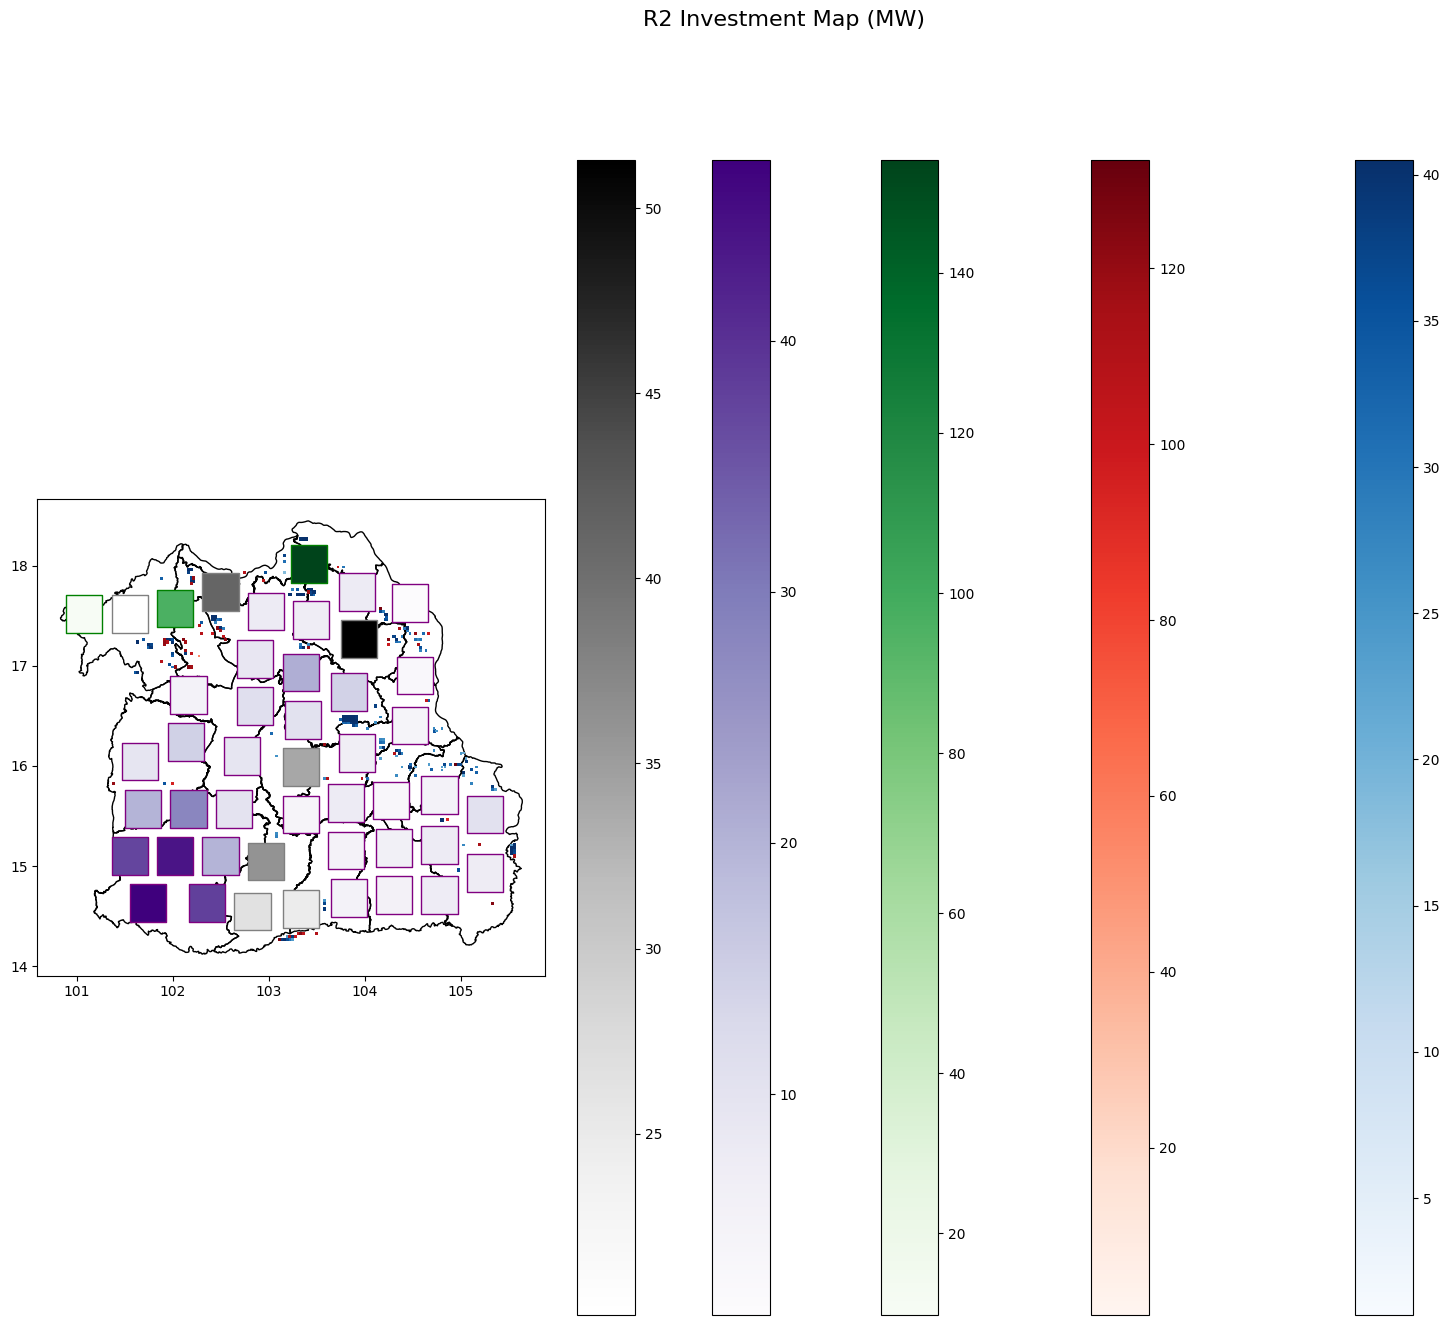

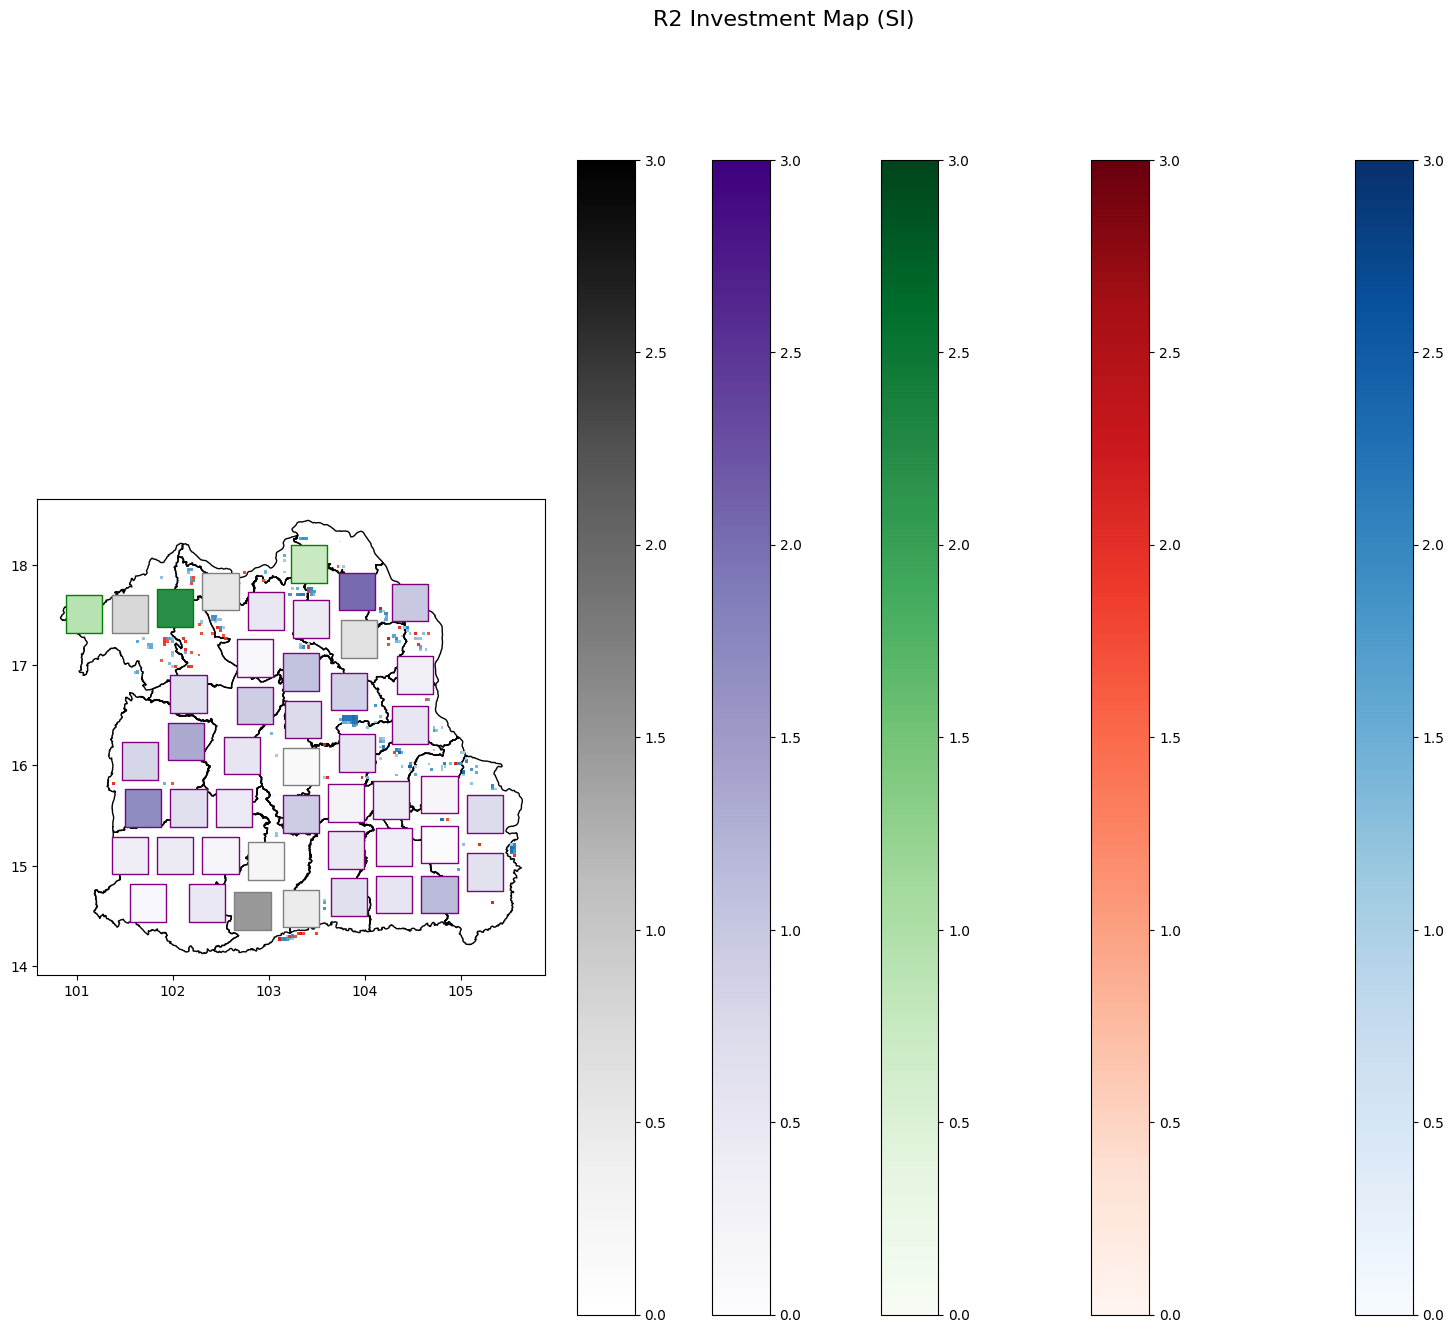

In [33]:
region = 'R2'
specificarea = thailandmap.loc[thailandmap['region'] == region]
bound = specificarea.unary_union.bounds

print("total wind capacity = ", df_wind['cap_wind'].loc[df_wind['region'] == region].sum())

print("total solar capacity = ", df_solar['cap_solar'].loc[df_solar['region'] == region].sum())

print("total biomass capacity = ", df_biomass['cap_biomass'].loc[df_biomass['region'] == region].sum())

print("total bgec capacity = ", df_bgec['cap_bgec'].loc[df_bgec['region'] == region].sum())

print("total msw capacity = ", df_msw['cap_msw'].loc[df_msw['region'] == region].sum())

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle(region + ' Investment Map (MW) ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend = True,zorder = 1,column = 'cap_wind',cmap = 'Blues')
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend = True,zorder = 2,column = 'cap_solar',cmap = 'Reds')
except:
    None
try:
    df_biomass.loc[df_biomass['region'] == region].plot(ax = ax,legend = True,zorder = 3,column = 'cap_biomass',cmap = 'Greens',edgecolors = 'green')
except:
    None
try:
    df_bgec.loc[df_bgec['region'] == region].plot(ax = ax,legend = True,zorder = 4,column = 'cap_bgec',cmap = 'Purples',edgecolors = 'purple')
except:
    None
try:
    df_msw.loc[df_msw['region'] == region].plot(ax = ax,legend = True,zorder = 5,column = 'cap_msw',cmap = 'Greys',edgecolors = 'grey')
except:
    None

fig, ax = plt.subplots(figsize=(20,15))
fig.suptitle(region + ' Investment Map (SI) ', fontsize=16)
specificarea.plot(ax = ax, color='none', edgecolor = 'black', zorder = 0)
try:
    df_wind.loc[df_wind['region'] == region].plot(ax = ax,legend=True,zorder = 1,column = 'SI_Wind',cmap = 'Blues',vmin = 0,vmax=3)
except:
    None
try:
    df_solar.loc[df_solar['region'] == region].plot(ax = ax,legend=True,zorder = 2,column = 'SI_Solar',cmap = 'Reds',vmin = 0,vmax=3)
except:
    None
try:
    df_biomass.loc[df_biomass['region'] == region].plot(ax = ax,legend=True,zorder = 3,column = 'SI_Biomass',cmap = 'Greens',edgecolors = 'green',vmin = 0,vmax=3)
except:
    None
try:
    df_bgec.loc[df_bgec['region'] == region].plot(ax = ax,legend=True,zorder = 4,column = 'SI_BGEC',cmap = 'Purples',edgecolors = 'purple',vmin = 0,vmax=3)
except:
    None
try:
    df_msw.loc[df_msw['region'] == region].plot(ax = ax,legend=True,zorder = 5,column = 'SI_MSW',cmap = 'Greys',edgecolors = 'grey',vmin = 0,vmax=3)
except:
    None